In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [2]:
####################  importing libraries ######################

import numpy as np
import cv2
from scipy import ndimage
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import rgb2hsv
import glob
import os
import keras
from skimage.transform import resize
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [3]:
from keras.engine.data_adapter import pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [4]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, string_='', figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth', fontsize=fontsize)
    plt.xlabel('Prediction', fontsize=fontsize)
    plt.savefig(f'/content/drive/MyDrive/ES/EX_Dataset& Code/code/images/conf_mat_{string_}.png', format='png', dpi=400)

In [8]:
valid_path = '/content/drive/MyDrive/ES/EX_Dataset& Code/train_val_test_split/val'
test_path = '/content/drive/MyDrive/ES/EX_Dataset& Code/train_val_test_split/test'

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
validation_set = val_datagen.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [4]:
loaded_valid_dn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_dn_actual_vs_pred.npz')

actual_valid_dn = loaded_valid_dn['actual_valid_dn']
pred_valid_dn = loaded_valid_dn['pred_valid_dn']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_dn, pred_valid_dn))

Showing Accuracy: 
0.9591836734693877


In [5]:
print(classification_report(actual_valid_dn, pred_valid_dn, digits=5))

              precision    recall  f1-score   support

         0.0    0.95000   0.96939   0.95960        98
         1.0    0.96875   0.94898   0.95876        98

    accuracy                        0.95918       196
   macro avg    0.95937   0.95918   0.95918       196
weighted avg    0.95937   0.95918   0.95918       196



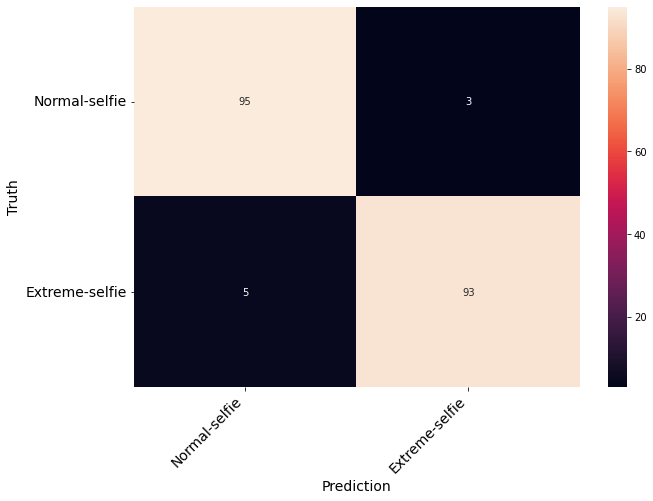

In [16]:
conf_mat = confusion_matrix(actual_valid_dn, pred_valid_dn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_dn")

In [8]:
loaded_test_dn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_dn_actual_vs_pred.npz')

actual_test_dn = loaded_test_dn['actual_test_dn']
pred_test_dn = loaded_test_dn['pred_test_dn']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_dn, pred_test_dn))

Showing Accuracy: 
0.97


In [9]:
print(classification_report(actual_test_dn, pred_test_dn, digits=5))

              precision    recall  f1-score   support

         0.0    0.95192   0.99000   0.97059       100
         1.0    0.98958   0.95000   0.96939       100

    accuracy                        0.97000       200
   macro avg    0.97075   0.97000   0.96999       200
weighted avg    0.97075   0.97000   0.96999       200



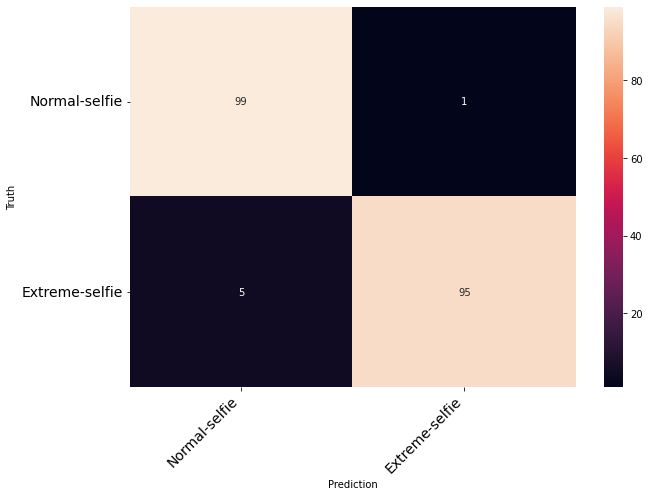

In [8]:
conf_mat = confusion_matrix(actual_test_dn, pred_test_dn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_dn")

In [10]:
loaded_valid_inc = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_inc_actual_vs_pred.npz')

actual_valid_inc = loaded_valid_inc['actual_valid_inc']
pred_valid_inc = loaded_valid_inc['pred_valid_inc']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_inc, pred_valid_inc))

Showing Accuracy: 
0.9744897959183674


In [11]:
print(classification_report(actual_valid_inc, pred_valid_inc, digits=5))

              precision    recall  f1-score   support

         0.0    0.98947   0.95918   0.97409        98
         1.0    0.96040   0.98980   0.97487        98

    accuracy                        0.97449       196
   macro avg    0.97493   0.97449   0.97448       196
weighted avg    0.97493   0.97449   0.97448       196



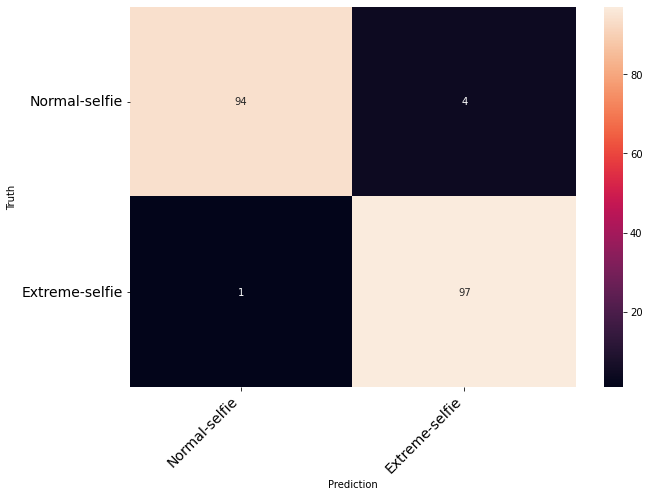

In [10]:
conf_mat = confusion_matrix(actual_valid_inc, pred_valid_inc)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_inc")

In [12]:
loaded_test_inc = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_inc_actual_vs_pred.npz')

actual_test_inc = loaded_test_inc['actual_test_inc']
pred_test_inc = loaded_test_inc['pred_test_inc']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_inc, pred_test_inc))

Showing Accuracy: 
0.95


In [13]:
print(classification_report(actual_test_inc, pred_test_inc, digits=5))

              precision    recall  f1-score   support

         0.0    0.95000   0.95000   0.95000       100
         1.0    0.95000   0.95000   0.95000       100

    accuracy                        0.95000       200
   macro avg    0.95000   0.95000   0.95000       200
weighted avg    0.95000   0.95000   0.95000       200



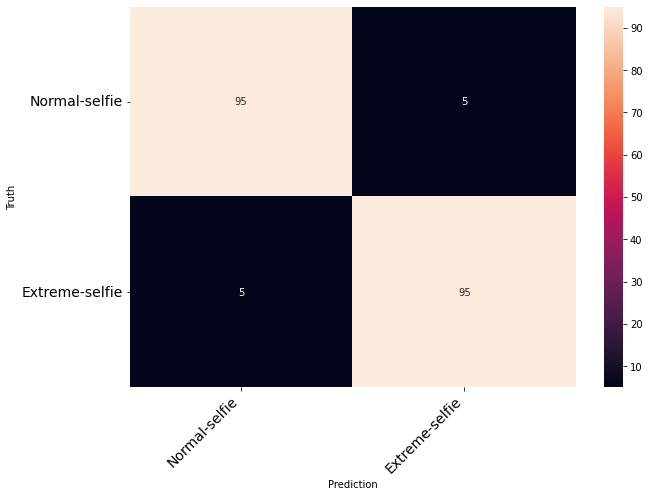

In [12]:
conf_mat = confusion_matrix(actual_test_inc, pred_test_inc)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_inc")

In [14]:
loaded_valid_mn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_mn_actual_vs_pred.npz')

actual_valid_mn = loaded_valid_mn['actual_valid_mn']
pred_valid_mn = loaded_valid_mn['pred_valid_mn']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_mn, pred_valid_mn))

Showing Accuracy: 
0.9540816326530612


In [15]:
print(classification_report(actual_valid_mn, pred_valid_mn, digits=5))

              precision    recall  f1-score   support

         0.0    0.95876   0.94898   0.95385        98
         1.0    0.94949   0.95918   0.95431        98

    accuracy                        0.95408       196
   macro avg    0.95413   0.95408   0.95408       196
weighted avg    0.95413   0.95408   0.95408       196



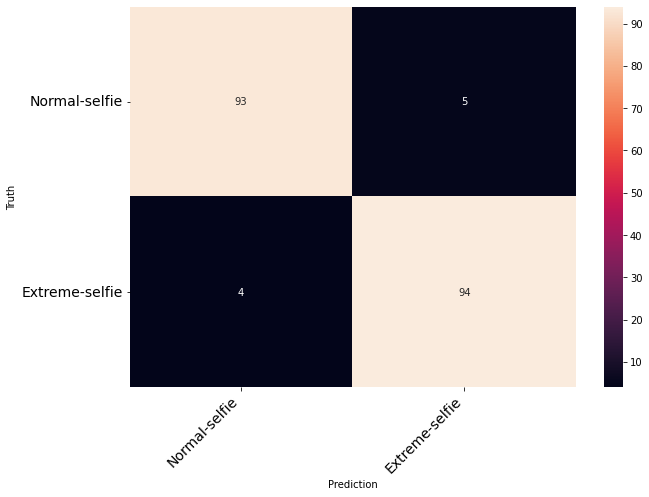

In [14]:
conf_mat = confusion_matrix(actual_valid_mn, pred_valid_mn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_mn")

In [16]:
loaded_test_mn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_mn_actual_vs_pred.npz')

actual_test_mn = loaded_test_mn['actual_test_mn']
pred_test_mn = loaded_test_mn['pred_test_mn']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_mn, pred_test_mn))

Showing Accuracy: 
0.94


In [17]:
print(classification_report(actual_test_mn, pred_test_mn, digits=5))

              precision    recall  f1-score   support

         0.0    0.91509   0.97000   0.94175       100
         1.0    0.96809   0.91000   0.93814       100

    accuracy                        0.94000       200
   macro avg    0.94159   0.94000   0.93995       200
weighted avg    0.94159   0.94000   0.93995       200



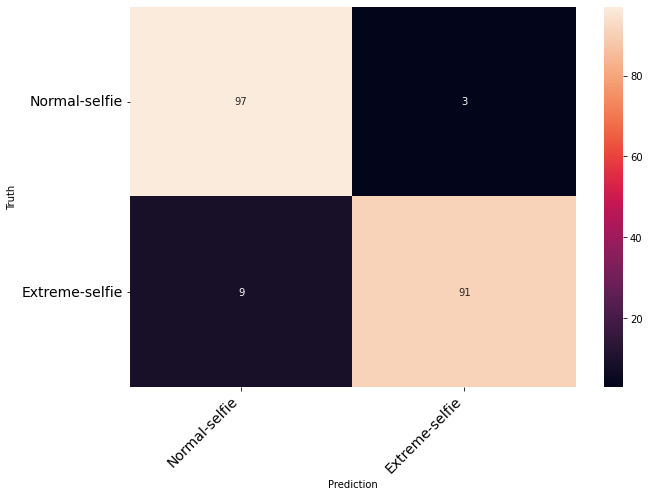

In [16]:
conf_mat = confusion_matrix(actual_test_mn, pred_test_mn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_mn")

In [18]:
loaded_valid_rn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_rn_actual_vs_pred.npz')

actual_valid_rn = loaded_valid_rn['actual_valid_rn']
pred_valid_rn = loaded_valid_rn['pred_valid_rn']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_rn, pred_valid_rn))

Showing Accuracy: 
0.8367346938775511


In [19]:
print(classification_report(actual_valid_rn, pred_valid_rn, digits=5))

              precision    recall  f1-score   support

         0.0    0.88372   0.77551   0.82609        98
         1.0    0.80000   0.89796   0.84615        98

    accuracy                        0.83673       196
   macro avg    0.84186   0.83673   0.83612       196
weighted avg    0.84186   0.83673   0.83612       196



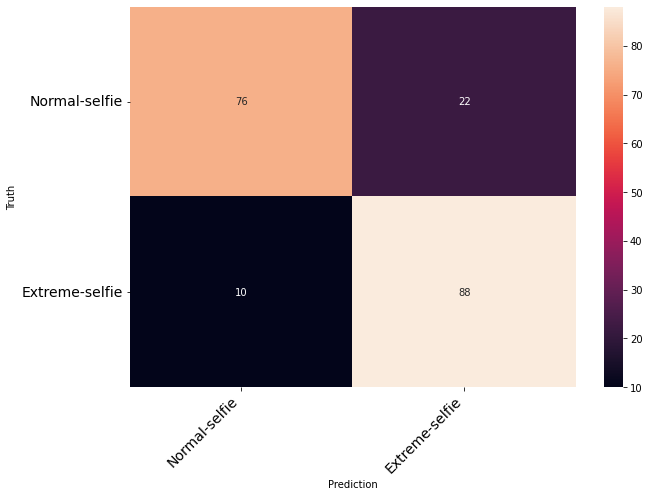

In [18]:
conf_mat = confusion_matrix(actual_valid_rn, pred_valid_rn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_rn")

In [20]:
loaded_test_rn = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_rn_actual_vs_pred.npz')

actual_test_rn = loaded_test_rn['actual_test_rn']
pred_test_rn = loaded_test_rn['pred_test_rn']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_rn, pred_test_rn))

Showing Accuracy: 
0.885


In [21]:
print(classification_report(actual_test_rn, pred_test_rn, digits=5))

              precision    recall  f1-score   support

         0.0    0.86667   0.91000   0.88780       100
         1.0    0.90526   0.86000   0.88205       100

    accuracy                        0.88500       200
   macro avg    0.88596   0.88500   0.88493       200
weighted avg    0.88596   0.88500   0.88493       200



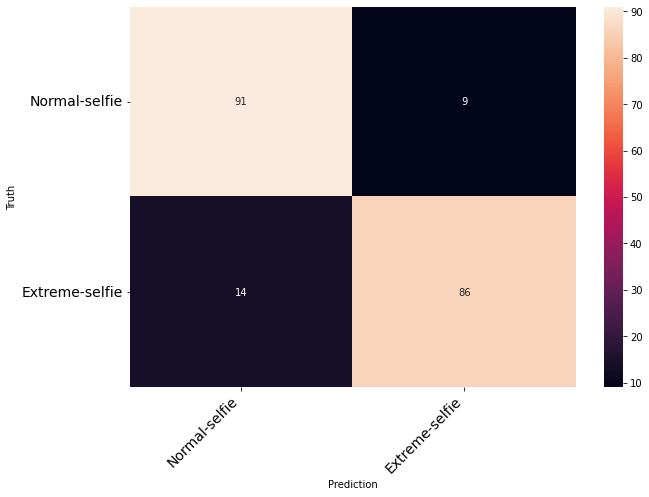

In [20]:
conf_mat = confusion_matrix(actual_test_rn, pred_test_rn)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_rn")

In [22]:
loaded_valid_v16 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_v16_actual_vs_pred.npz')

actual_valid_v16 = loaded_valid_v16['actual_valid_v16']
pred_valid_v16 = loaded_valid_v16['pred_valid_v16']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_v16, pred_valid_v16))

Showing Accuracy: 
0.9642857142857143


In [23]:
print(classification_report(actual_valid_v16, pred_valid_v16, digits=5))

              precision    recall  f1-score   support

         0.0    0.96907   0.95918   0.96410        98
         1.0    0.95960   0.96939   0.96447        98

    accuracy                        0.96429       196
   macro avg    0.96433   0.96429   0.96428       196
weighted avg    0.96433   0.96429   0.96428       196



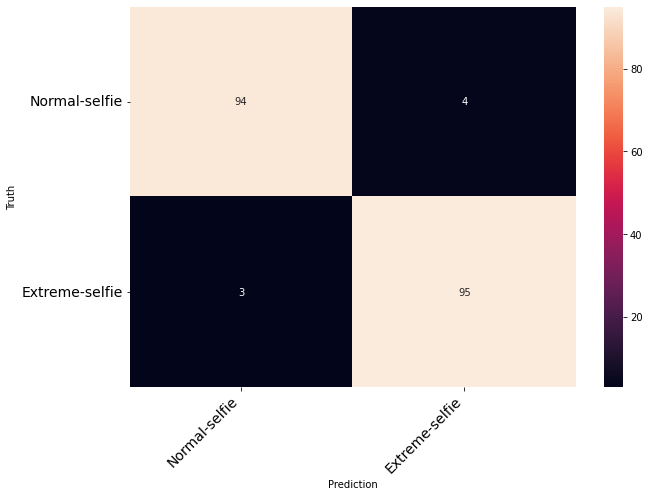

In [22]:
conf_mat = confusion_matrix(actual_valid_v16, pred_valid_v16)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_v16")

In [24]:
loaded_test_v16 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_v16_actual_vs_pred.npz')

actual_test_v16 = loaded_test_v16['actual_test_v16']
pred_test_v16 = loaded_test_v16['pred_test_v16']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_v16, pred_test_v16))

Showing Accuracy: 
0.95


In [25]:
print(classification_report(actual_test_v16, pred_test_v16, digits=5))

              precision    recall  f1-score   support

         0.0    0.91667   0.99000   0.95192       100
         1.0    0.98913   0.91000   0.94792       100

    accuracy                        0.95000       200
   macro avg    0.95290   0.95000   0.94992       200
weighted avg    0.95290   0.95000   0.94992       200



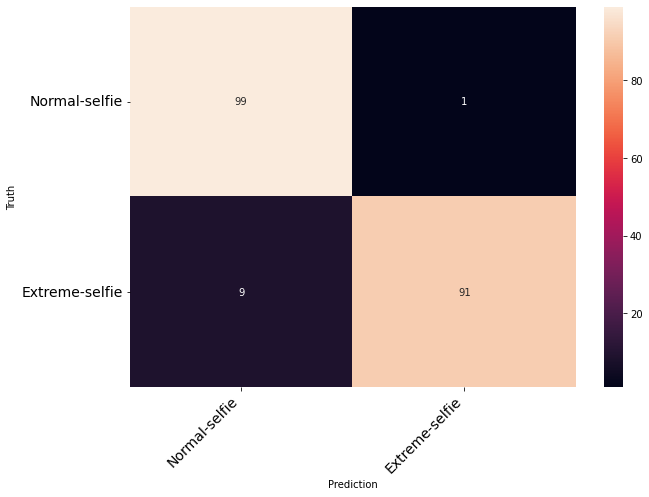

In [24]:
conf_mat = confusion_matrix(actual_test_v16, pred_test_v16)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_v16")

In [26]:
loaded_valid_v19 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_v19_actual_vs_pred.npz')

actual_valid_v19 = loaded_valid_v19['actual_valid_v19']
pred_valid_v19 = loaded_valid_v19['pred_valid_v19']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_v19, pred_valid_v19))

Showing Accuracy: 
0.9591836734693877


In [27]:
print(classification_report(actual_valid_v19, pred_valid_v19, digits=5))

              precision    recall  f1-score   support

         0.0    0.97872   0.93878   0.95833        98
         1.0    0.94118   0.97959   0.96000        98

    accuracy                        0.95918       196
   macro avg    0.95995   0.95918   0.95917       196
weighted avg    0.95995   0.95918   0.95917       196



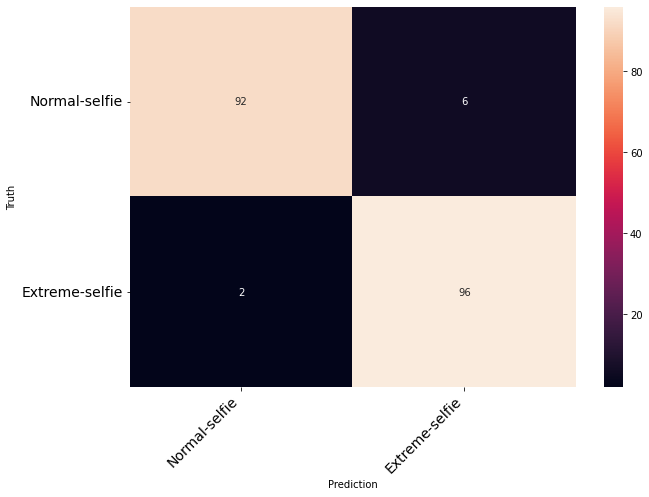

In [26]:
conf_mat = confusion_matrix(actual_valid_v19, pred_valid_v19)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_v19")

In [28]:
loaded_test_v19 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_v19_actual_vs_pred.npz')

actual_test_v19 = loaded_test_v19['actual_test_v19']
pred_test_v19 = loaded_test_v19['pred_test_v19']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_v19, pred_test_v19))

Showing Accuracy: 
0.93


In [29]:
print(classification_report(actual_test_v19, pred_test_v19, digits=5))

              precision    recall  f1-score   support

         0.0    0.93000   0.93000   0.93000       100
         1.0    0.93000   0.93000   0.93000       100

    accuracy                        0.93000       200
   macro avg    0.93000   0.93000   0.93000       200
weighted avg    0.93000   0.93000   0.93000       200



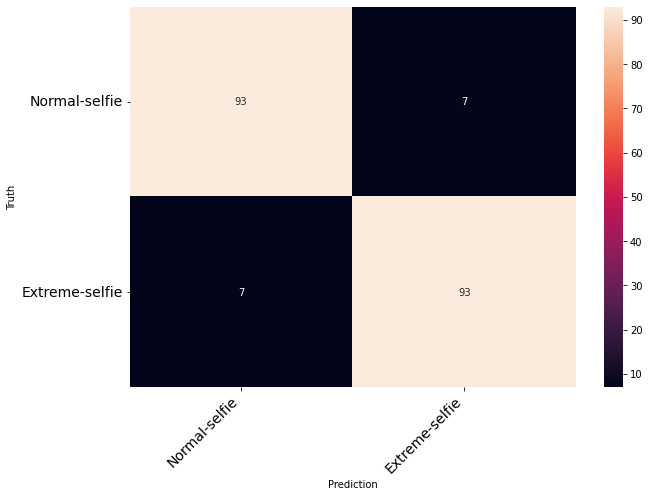

In [28]:
conf_mat = confusion_matrix(actual_test_v19, pred_test_v19)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_v19")

In [23]:
best_model_dn = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/dn')
best_model_inc = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/inc')
best_model_mn = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/mn')
best_model_rn = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/rn')
best_model_v16 = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/v16')
best_model_v19 = load_model('/content/drive/MyDrive/ES/EX_Dataset& Code/code/models/v19')

In [24]:
#################### Defining Average Ensemble model from already trained 6 DNN Models

model_input = keras.Input(shape=(224, 224, 3,))
y1 = best_model_dn(model_input)
y2 = best_model_inc(model_input)
y3 = best_model_mn(model_input)
y4 = best_model_rn(model_input)
y5 = best_model_v16(model_input)
y6 = best_model_v19(model_input)
print("The average of the layers in the model")
model_output = layers.average([y1, y2, y3, y4, y5, y6])
print("Ensemble model is being created")
ensemble_model_all_6 = keras.Model(inputs=model_input, outputs=model_output)

print("Showing Ensembled Model Summary")
print(ensemble_model_all_6.summary())

The average of the layers in the model
Ensemble model is being created
Showing Ensembled Model Summary
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 2)            7137858     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 2)            21905186    ['input_1[0][0]']                
                                                                                          

In [27]:
#Compiling Model and Evaluating on the validation data
ensemble_model_all_6.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])
output = ensemble_model_all_6.evaluate(validation_set)

7/7 [==============================] - 237s 32s/step - loss: 0.1456 - accuracy: 0.9796


In [28]:
# Evaluating on the test data 

output = ensemble_model_all_6.evaluate(test_set)

7/7 [==============================] - 244s 34s/step - loss: 0.1368 - accuracy: 0.9800


In [25]:
def actual_vs_pred_tri(model,dataset):
  # Finding the Prediction on validation/test images

  actual_label_array = np.zeros((dataset.n), dtype=np.float32)
  predicted_output_array = np.zeros((dataset.n), dtype=np.float32)

  total_data_batches = len(dataset)

  lower_index = 0

  for i in range(total_data_batches):
    tmp_set = dataset.next()
    out_put = model.predict( tmp_set[0] )
    upper_index = lower_index + out_put.shape[0]
    print("Processing Batch Number: ", i )
    # print(lower_index, upper_index, out_put.shape) 
    predicted_output_array[ lower_index : upper_index ] = np.argmax(out_put , axis=1)  
    actual_label_array[ lower_index : upper_index ] = np.argmax(tmp_set[1] , axis=1) 
    lower_index = upper_index
      
  return actual_label_array, predicted_output_array

In [29]:
actual_valid_all_6, pred_valid_all_6 = actual_vs_pred_tri(model=ensemble_model_all_6, dataset=validation_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_all_6_actual_vs_pred.npz', 
         actual_valid_all_6=actual_valid_all_6, 
         pred_valid_all_6=pred_valid_all_6)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [30]:
actual_test_all_6, pred_test_all_6 = actual_vs_pred_tri(model=ensemble_model_all_6, dataset=test_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_all_6_actual_vs_pred.npz', 
         actual_test_all_6=actual_test_all_6, 
         pred_test_all_6=pred_test_all_6)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [31]:
print("The average of the layers in the model")
model_output_3 = layers.average([y1, y2, y3])
print("Ensemble model is being created")
ensemble_model_any_3 = keras.Model(inputs=model_input, outputs=model_output_3)

print("Showing Ensembled Model Summary")
print(ensemble_model_any_3.summary())

#Compiling Model and Evaluating on the validation data
ensemble_model_any_3.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

The average of the layers in the model
Ensemble model is being created
Showing Ensembled Model Summary
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 2)            7137858     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 2)            21905186    ['input_1[0][0]']                
                                                                                        

In [32]:
actual_valid_any_3, pred_valid_any_3 = actual_vs_pred_tri(model=ensemble_model_any_3, dataset=validation_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_3_actual_vs_pred.npz', 
         actual_valid_any_3=actual_valid_any_3, 
         pred_valid_any_3=pred_valid_any_3)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [33]:
actual_test_any_3, pred_test_any_3 = actual_vs_pred_tri(model=ensemble_model_any_3, dataset=test_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_3_actual_vs_pred.npz', 
         actual_test_any_3=actual_test_any_3, 
         pred_test_any_3=pred_test_any_3)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [34]:
print("The average of the layers in the model")
model_output_4 = layers.average([y1, y2, y3, y5])
print("Ensemble model is being created")
ensemble_model_any_4 = keras.Model(inputs=model_input, outputs=model_output_4)

print("Showing Ensembled Model Summary")
print(ensemble_model_any_4.summary())

#Compiling Model and Evaluating on the validation data
ensemble_model_any_4.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

The average of the layers in the model
Ensemble model is being created
Showing Ensembled Model Summary
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 2)            7137858     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 2)            21905186    ['input_1[0][0]']                
                                                                                        

In [35]:
actual_valid_any_4, pred_valid_any_4 = actual_vs_pred_tri(model=ensemble_model_any_4, dataset=validation_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_4_actual_vs_pred.npz', 
         actual_valid_any_4=actual_valid_any_4, 
         pred_valid_any_4=pred_valid_any_4)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [36]:
actual_test_any_4, pred_test_any_4 = actual_vs_pred_tri(model=ensemble_model_any_4, dataset=test_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_4_actual_vs_pred.npz', 
         actual_test_any_4=actual_test_any_4, 
         pred_test_any_4=pred_test_any_4)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [37]:
print("The average of the layers in the model")
model_output_5 = layers.average([y1, y2, y3, y5, y6])
print("Ensemble model is being created")
ensemble_model_any_5 = keras.Model(inputs=model_input, outputs=model_output_5)

print("Showing Ensembled Model Summary")
print(ensemble_model_any_5.summary())

#Compiling Model and Evaluating on the validation data
ensemble_model_any_5.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

The average of the layers in the model
Ensemble model is being created
Showing Ensembled Model Summary
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 2)            7137858     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 2)            21905186    ['input_1[0][0]']                
                                                                                        

In [38]:
actual_valid_any_5, pred_valid_any_5 = actual_vs_pred_tri(model=ensemble_model_any_5, dataset=validation_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_5_actual_vs_pred.npz', 
         actual_valid_any_5=actual_valid_any_5, 
         pred_valid_any_5=pred_valid_any_5)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [39]:
actual_test_any_5, pred_test_any_5 = actual_vs_pred_tri(model=ensemble_model_any_5, dataset=test_set)

np.savez('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_5_actual_vs_pred.npz', 
         actual_test_any_5=actual_test_any_5, 
         pred_test_any_5=pred_test_any_5)

print("Arrays saved")

Processing Batch Number:  0
Processing Batch Number:  1
Processing Batch Number:  2
Processing Batch Number:  3
Processing Batch Number:  4
Processing Batch Number:  5
Processing Batch Number:  6
Arrays saved


In [5]:
loaded_valid_all_6 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_all_6_actual_vs_pred.npz')

actual_valid_all_6 = loaded_valid_all_6['actual_valid_all_6']
pred_valid_all_6 = loaded_valid_all_6['pred_valid_all_6']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_all_6, pred_valid_all_6))

Showing Accuracy: 
0.9693877551020408


In [31]:
print(classification_report(actual_valid_all_6, pred_valid_all_6, digits=5))

              precision    recall  f1-score   support

         0.0    0.96842   0.96842   0.96842        95
         1.0    0.97030   0.97030   0.97030       101

    accuracy                        0.96939       196
   macro avg    0.96936   0.96936   0.96936       196
weighted avg    0.96939   0.96939   0.96939       196



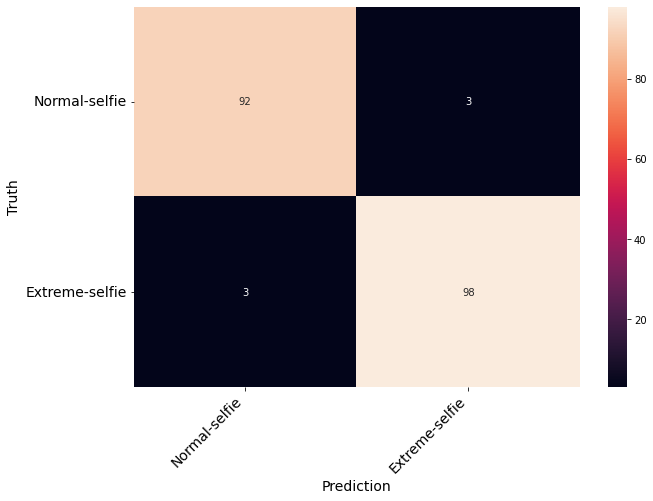

In [6]:
conf_mat = confusion_matrix(actual_valid_all_6, pred_valid_all_6)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_all_6")

In [7]:
loaded_test_all_6 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_all_6_actual_vs_pred.npz')

actual_test_all_6 = loaded_test_all_6['actual_test_all_6']
pred_test_all_6 = loaded_test_all_6['pred_test_all_6']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_all_6, pred_test_all_6))

Showing Accuracy: 
0.98


In [33]:
print(classification_report(actual_test_all_6, pred_test_all_6, digits=5))

              precision    recall  f1-score   support

         0.0    0.97059   0.99000   0.98020       100
         1.0    0.98980   0.97000   0.97980       100

    accuracy                        0.98000       200
   macro avg    0.98019   0.98000   0.98000       200
weighted avg    0.98019   0.98000   0.98000       200



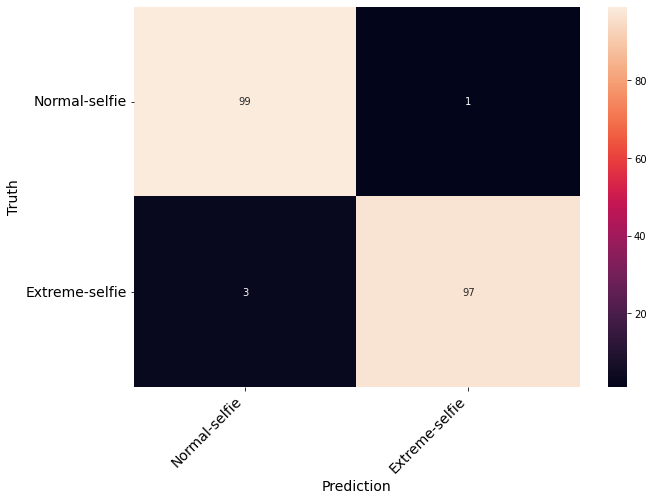

In [8]:
conf_mat = confusion_matrix(actual_test_all_6, pred_test_all_6)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_all_6")

In [34]:
loaded_valid_any_3 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_3_actual_vs_pred.npz')

actual_valid_any_3 = loaded_valid_any_3['actual_valid_any_3']
pred_valid_any_3 = loaded_valid_any_3['pred_valid_any_3']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_any_3, pred_valid_any_3))

Showing Accuracy: 
0.9744897959183674


In [35]:
print(classification_report(actual_valid_any_3, pred_valid_any_3, digits=5))

              precision    recall  f1-score   support

         0.0    0.96970   0.97959   0.97462        98
         1.0    0.97938   0.96939   0.97436        98

    accuracy                        0.97449       196
   macro avg    0.97454   0.97449   0.97449       196
weighted avg    0.97454   0.97449   0.97449       196



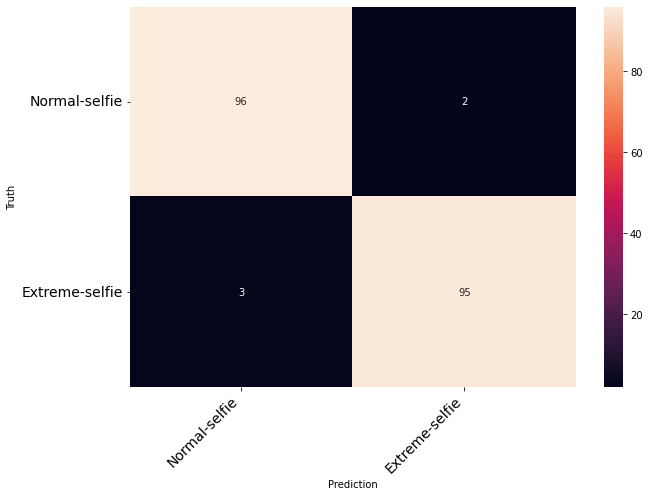

In [34]:
conf_mat = confusion_matrix(actual_valid_any_3, pred_valid_any_3)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_any_3")

In [36]:
loaded_test_any_3 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_3_actual_vs_pred.npz')

actual_test_any_3 = loaded_test_any_3['actual_test_any_3']
pred_test_any_3 = loaded_test_any_3['pred_test_any_3']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_any_3, pred_test_any_3))

Showing Accuracy: 
0.97


In [37]:
print(classification_report(actual_test_any_3, pred_test_any_3, digits=5))

              precision    recall  f1-score   support

         0.0    0.95192   0.99000   0.97059       100
         1.0    0.98958   0.95000   0.96939       100

    accuracy                        0.97000       200
   macro avg    0.97075   0.97000   0.96999       200
weighted avg    0.97075   0.97000   0.96999       200



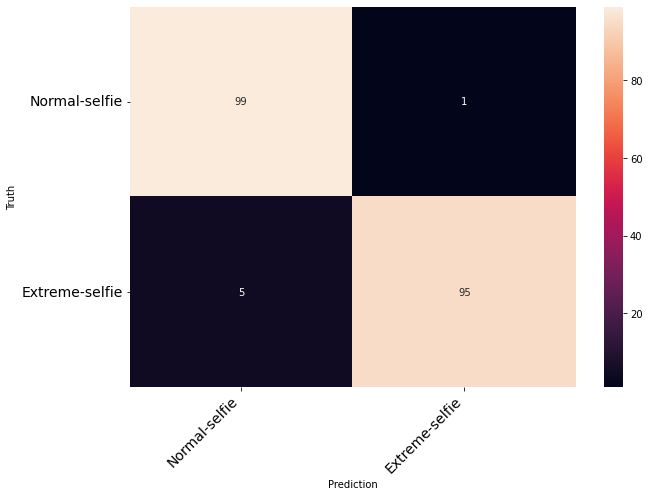

In [36]:
conf_mat = confusion_matrix(actual_test_any_3, pred_test_any_3)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_any_3")

In [38]:
loaded_valid_any_4 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_4_actual_vs_pred.npz')

actual_valid_any_4 = loaded_valid_any_4['actual_valid_any_4']
pred_valid_any_4 = loaded_valid_any_4['pred_valid_any_4']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_any_4, pred_valid_any_4))

Showing Accuracy: 
0.9540816326530612


In [39]:
print(classification_report(actual_valid_any_4, pred_valid_any_4, digits=5))

              precision    recall  f1-score   support

         0.0    0.96809   0.93814   0.95288        97
         1.0    0.94118   0.96970   0.95522        99

    accuracy                        0.95408       196
   macro avg    0.95463   0.95392   0.95405       196
weighted avg    0.95449   0.95408   0.95406       196



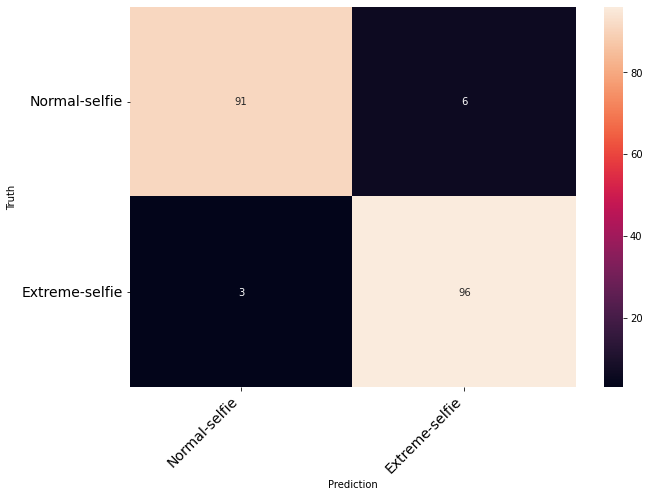

In [38]:
conf_mat = confusion_matrix(actual_valid_any_4, pred_valid_any_4)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_any_4")

In [40]:
loaded_test_any_4 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_4_actual_vs_pred.npz')

actual_test_any_4 = loaded_test_any_4['actual_test_any_4']
pred_test_any_4 = loaded_test_any_4['pred_test_any_4']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_any_4, pred_test_any_4))

Showing Accuracy: 
0.965


In [41]:
print(classification_report(actual_test_any_4, pred_test_any_4, digits=5))

              precision    recall  f1-score   support

         0.0    0.94286   0.99000   0.96585       100
         1.0    0.98947   0.94000   0.96410       100

    accuracy                        0.96500       200
   macro avg    0.96617   0.96500   0.96498       200
weighted avg    0.96617   0.96500   0.96498       200



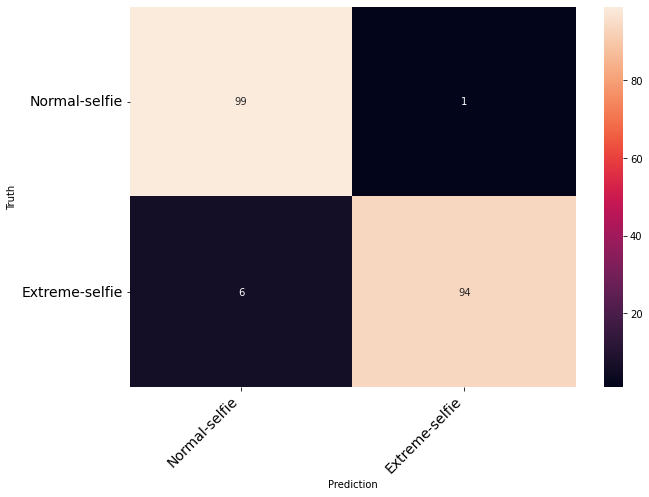

In [40]:
conf_mat = confusion_matrix(actual_test_any_4, pred_test_any_4)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_any_4")

In [42]:
loaded_valid_any_5 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/valid_any_5_actual_vs_pred.npz')

actual_valid_any_5 = loaded_valid_any_5['actual_valid_any_5']
pred_valid_any_5 = loaded_valid_any_5['pred_valid_any_5']

print("Showing Accuracy: ")
print(accuracy_score(actual_valid_any_5, pred_valid_any_5))

Showing Accuracy: 
0.9744897959183674


In [43]:
print(classification_report(actual_valid_any_5, pred_valid_any_5, digits=5))

              precision    recall  f1-score   support

         0.0    0.98901   0.95745   0.97297        94
         1.0    0.96190   0.99020   0.97585       102

    accuracy                        0.97449       196
   macro avg    0.97546   0.97382   0.97441       196
weighted avg    0.97490   0.97449   0.97447       196



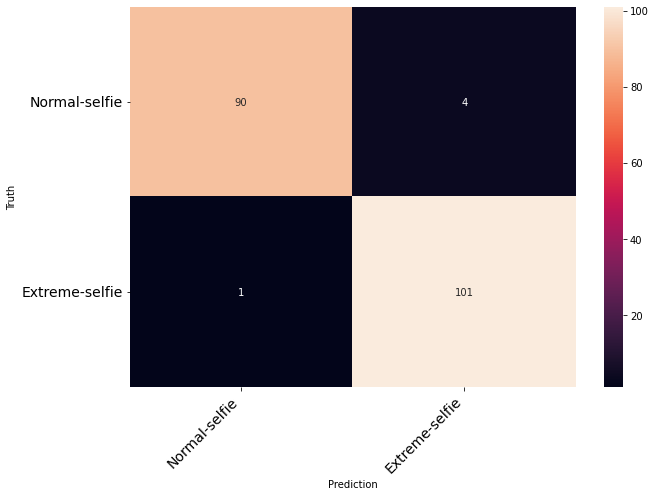

In [42]:
conf_mat = confusion_matrix(actual_valid_any_5, pred_valid_any_5)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="valid_any_5")

In [44]:
loaded_test_any_5 = np.load('/content/drive/MyDrive/ES/EX_Dataset& Code/code/actual_vs_pred/test_any_5_actual_vs_pred.npz')

actual_test_any_5 = loaded_test_any_5['actual_test_any_5']
pred_test_any_5 = loaded_test_any_5['pred_test_any_5']

print("Showing Accuracy: ")
print(accuracy_score(actual_test_any_5, pred_test_any_5))

Showing Accuracy: 
0.97


In [45]:
print(classification_report(actual_test_any_5, pred_test_any_5, digits=5))

              precision    recall  f1-score   support

         0.0    0.95192   0.99000   0.97059       100
         1.0    0.98958   0.95000   0.96939       100

    accuracy                        0.97000       200
   macro avg    0.97075   0.97000   0.96999       200
weighted avg    0.97075   0.97000   0.96999       200



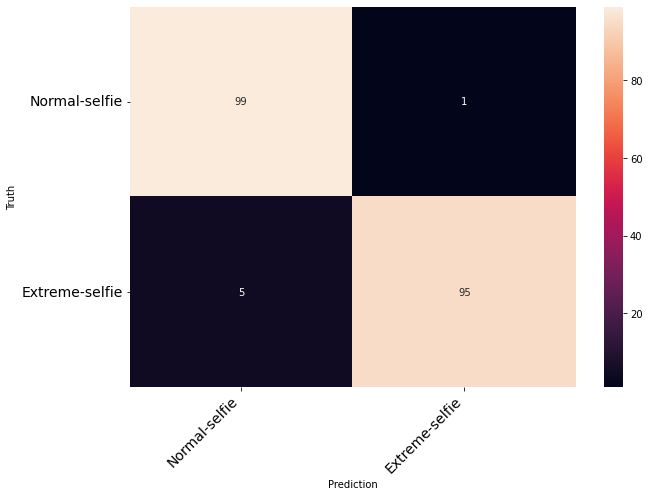

In [44]:
conf_mat = confusion_matrix(actual_test_any_5, pred_test_any_5)
print_confusion_matrix(confusion_matrix=conf_mat,class_names=["Normal-selfie","Extreme-selfie"],string_="test_any_5")